<a href="https://colab.research.google.com/github/JairArcos/CountingStars/blob/main/python_correlaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

## Target: Variable numerica

In [ ]:
# URL directa al archivo CSV en GitHub
url = "https://raw.githubusercontent.com/SergioDP94/Talleres/c042c5d4e365c9bc5ddccd7b8d58fc82bfc7df88/EDA/data_cor.csv"
data = pd.read_csv(url)
data.head()

In [ ]:
data.describe()

,y,x1,x2,x3,x4,x5,x6
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.38620,49.909930,8.04130,7775.534860,59.630450,-0.259650,9.914390
std,19.58436,10.721979,3.62174,3762.220958,7.442911,7.171693,1.511043
min,35.20000,15.430000,-0.65000,589.510000,36.170000,-9.740000,3.980000
25%,87.07500,42.527500,5.62000,5070.690000,54.880000,-7.210000,8.950000
50%,100.50000,49.880000,7.41000,7326.775000,59.865000,-4.955000,10.010000
75%,113.00000,57.120000,9.81000,9834.620000,64.792500,7.030000,10.950000
max,177.10000,84.340000,34.51000,25076.170000,83.350000,10.240000,13.970000


### Relaciones monotonicas

### **Pearson (Coeficiente de Correlación de Pearson)**
- **Condiciones/Supuestos**:
  - **Relación lineal**: Asume que hay una relación lineal entre las dos variables. Si la relación no es lineal, el coeficiente de Pearson puede subestimar o no detectar la correlación.
  - **Distribución normal**: Las variables deben seguir una distribución aproximadamente normal, especialmente si se usa para hacer inferencias estadísticas.
  - **Escala de intervalo o razón**: Las variables deben ser continuas y estar medidas en una escala de intervalo o razón (es decir, deben tener un significado en términos de distancia entre puntos de datos).
  - **Homocedasticidad**: Las varianzas de las variables deben ser constantes a lo largo de la línea de regresión.

In [ ]:
data.corr(numeric_only=True)

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.928294,0.883711,0.906324,-0.031189,-0.032243,0.682245
x1,0.928294,1.000000,0.815590,0.831645,-0.021572,-0.029202,0.640835
x2,0.883711,0.815590,1.000000,0.841691,-0.050119,-0.027998,0.582872
x3,0.906324,0.831645,0.841691,1.000000,-0.034611,-0.012248,0.595914
x4,-0.031189,-0.021572,-0.050119,-0.034611,1.000000,-0.013594,-0.036695
x5,-0.032243,-0.029202,-0.027998,-0.012248,-0.013594,1.000000,-0.015603
x6,0.682245,0.640835,0.582872,0.595914,-0.036695,-0.015603,1.000000


### **Kendall (Coeficiente de Correlación de Kendall Tau)**
- **Condiciones/Supuestos**:
  - **Datos ordinales o continuos**: Se puede aplicar tanto a datos ordinales como a datos continuos. No requiere que los datos estén en una escala específica (por ejemplo, no necesita datos de intervalo o razón).
  - **Relación monotónica**: Asume que la relación entre las variables es monotónica, lo que significa que cuando una variable aumenta, la otra variable también aumenta o disminuye de manera consistente, sin importar si es lineal o no.
  - **Robustez a valores atípicos**: Es menos sensible a valores atípicos comparado con el coeficiente de Pearson.
  - **Uso en datos de clasificación**: Es adecuado para datos donde el orden de los valores es más importante que la magnitud de los cambios.

In [ ]:
data.corr(numeric_only=True,method='kendall')

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.757916,0.709308,0.736161,-0.028388,-0.034749,0.487885
x1,0.757916,1.000000,0.618367,0.636107,-0.020968,-0.025604,0.446334
x2,0.709308,0.618367,1.000000,0.618857,-0.040339,-0.038717,0.423194
x3,0.736161,0.636107,0.618857,1.000000,-0.031976,-0.017653,0.426629
x4,-0.028388,-0.020968,-0.040339,-0.031976,1.000000,0.006895,-0.037112
x5,-0.034749,-0.025604,-0.038717,-0.017653,0.006895,1.000000,-0.022480
x6,0.487885,0.446334,0.423194,0.426629,-0.037112,-0.022480,1.000000


### **Spearman (Coeficiente de Correlación por Rangos de Spearman)**
- **Condiciones/Supuestos**:
  - **Relación monotónica**: Similar al método de Kendall, asume una relación monotónica entre las variables. Esto significa que, a medida que una variable aumenta, la otra también aumenta o disminuye de manera consistente, pero no necesariamente de manera lineal.
  - **Datos ordinales o continuos**: Se puede usar con datos ordinales, intervalares o de razón, pero convierte los datos en rangos antes de calcular la correlación.
  - **No se requiere distribución normal**: No asume que los datos sigan una distribución normal, lo que lo hace útil para datos no paramétricos.
  - **Menos afectado por valores atípicos**: Es más robusto que Pearson a la presencia de valores atípicos.

In [ ]:
data.corr(numeric_only=True,method='spearman')

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.918762,0.884390,0.906161,-0.041580,-0.048124,0.678563
x1,0.918762,1.000000,0.808267,0.826662,-0.031070,-0.036220,0.629063
x2,0.884390,0.808267,1.000000,0.809268,-0.059802,-0.051844,0.598255
x3,0.906161,0.826662,0.809268,1.000000,-0.046888,-0.025626,0.601891
x4,-0.041580,-0.031070,-0.059802,-0.046888,1.000000,0.010752,-0.055175
x5,-0.048124,-0.036220,-0.051844,-0.025626,0.010752,1.000000,-0.032981
x6,0.678563,0.629063,0.598255,0.601891,-0.055175,-0.032981,1.000000


### Relaciones no monotonicas

In [ ]:
def pearsonr_(x,y):
  result = pearsonr(x,y)
  return result[0]

In [ ]:
data.corr(numeric_only=True,method=pearsonr_)

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.928294,0.883711,0.906324,-0.031189,-0.032243,0.682245
x1,0.928294,1.000000,0.815590,0.831645,-0.021572,-0.029202,0.640835
x2,0.883711,0.815590,1.000000,0.841691,-0.050119,-0.027998,0.582872
x3,0.906324,0.831645,0.841691,1.000000,-0.034611,-0.012248,0.595914
x4,-0.031189,-0.021572,-0.050119,-0.034611,1.000000,-0.013594,-0.036695
x5,-0.032243,-0.029202,-0.027998,-0.012248,-0.013594,1.000000,-0.015603
x6,0.682245,0.640835,0.582872,0.595914,-0.036695,-0.015603,1.000000


In [ ]:
def r2_quadratic(x, y):
    # Crear la matriz de diseño para el modelo cuadrático
    X = np.column_stack((np.ones(len(x)), x, x**2))  # Agrega el término constante y x^2
    model = sm.OLS(y, X).fit()  # Ajusta el modelo OLS
    return model.rsquared  # Retorna el R^2

In [ ]:
data.corr(numeric_only=True,method=r2_quadratic)

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.861845,0.848583,0.842084,0.001660,0.001065,0.470796
x1,0.861845,1.000000,0.722895,0.709228,0.001166,0.000887,0.414419
x2,0.848583,0.722895,1.000000,0.710104,0.002738,0.000795,0.366294
x3,0.842084,0.709228,0.710104,1.000000,0.001235,0.000287,0.374161
x4,0.001660,0.001166,0.002738,0.001235,1.000000,0.000218,0.002278
x5,0.001065,0.000887,0.000795,0.000287,0.000218,1.000000,0.200027
x6,0.470796,0.414419,0.366294,0.374161,0.002278,0.200027,1.000000


In [ ]:
def r2_polynomial(x, y, degree=2):
    # Crear la matriz de diseño para el modelo polinómico
    X = np.column_stack([x**i for i in range(degree + 1)])  # Generar términos x^0, x^1, ..., x^degree
    model = sm.OLS(y, X).fit()  # Ajusta el modelo OLS
    return model.rsquared  # Retorna el R^2

In [ ]:
def compute_r2_matrix(df, degree=2):
    # Inicializar una matriz de R^2
    correlation_matrix_r2 = pd.DataFrame(index=df.columns, columns=df.columns)

    # Llenar la matriz con el R^2 calculado
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 == col2:  # La diagonal debe ser 1
                correlation_matrix_r2.loc[col1, col2] = 1.0
            else:
                r2_value = r2_polynomial(df[col1], df[col2], degree)  # Especificar el grado
                correlation_matrix_r2.loc[col1, col2] = r2_value
                #correlation_matrix_r2.loc[col2, col1] = r2_value  # Hacerlo simétrico

    # Convertir la matriz a tipo float
    correlation_matrix_r2 = correlation_matrix_r2.astype(float)
    return correlation_matrix_r2

In [ ]:
compute_r2_matrix(data.select_dtypes(include=['number']), degree=3)

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.861883,0.856125,0.842171,0.002301,0.001233,0.470798
x1,0.862298,1.000000,0.732229,0.710033,0.002370,0.001158,0.414424
x2,0.803499,0.687173,1.000000,0.713614,0.003914,0.003200,0.367489
x3,0.844689,0.713804,0.722506,1.000000,0.001925,0.000346,0.379511
x4,0.004091,0.003737,0.006463,0.003514,1.000000,0.000303,0.006076
x5,0.406406,0.366556,0.313373,0.349297,0.004178,1.000000,0.200034
x6,0.473708,0.415623,0.367220,0.377275,0.003088,0.000439,1.000000


In [ ]:
def analyze_relationships(df, target_variable, max_degree=2):
    # Inicializar un DataFrame para los resultados
    results = pd.DataFrame(index=df.columns.difference([target_variable]), columns=range(1, max_degree + 1))

    # Calcular el R^2 para cada variable independiente
    for col in results.index:
        for degree in range(1, max_degree + 1):
            r2_value = r2_polynomial(df[col], df[target_variable], degree)
            results.loc[col, degree] = r2_value

    return results

In [ ]:
relationship_results = analyze_relationships(data.select_dtypes(include=['number']), target_variable='y', max_degree=5)
relationship_results

,1,2,3,4,5
x1,0.86173,0.861919,0.862298,0.862298,0.862298
x2,0.780945,0.803418,0.803499,0.804359,0.804415
x3,0.821422,0.840633,0.844689,0.778742,0.163981
x4,0.000973,0.001056,0.004091,0.005034,0.006298
x5,0.00104,0.40639,0.406406,0.409117,0.409406
x6,0.465458,0.473705,0.473708,0.475898,0.475967


<Axes: >

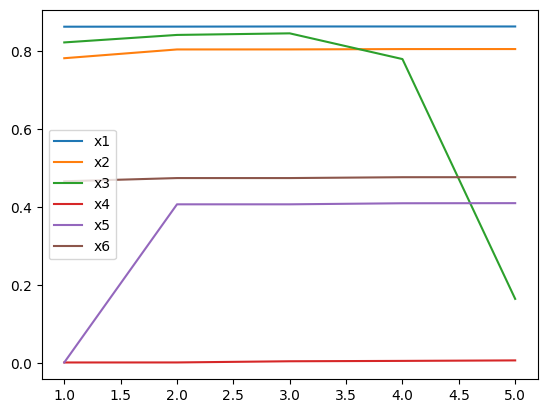

In [ ]:
relationship_results.T.plot()

### Numericas vs cualitativa

In [ ]:
from statsmodels.formula.api import ols

def anova_r_squared(df, target_variable):
    # Inicializar un diccionario para almacenar los resultados
    r_squared_results = {}

    # Iterar sobre cada columna del DataFrame
    for column in df.select_dtypes(include=['category', 'object']).columns:
        # Asegurarse de que la columna no sea la variable objetivo
        if column != target_variable:
            # Crear la fórmula para el modelo ANOVA
            formula = f"{target_variable} ~ C({column})"

            # Ajustar el modelo
            model = ols(formula, data=df).fit()
            # Obtener R²
            r_squared = model.rsquared

            # Almacenar el resultado
            r_squared_results[column] = r_squared

    # Convertir los resultados a un DataFrame
    r_squared_df = pd.DataFrame(list(r_squared_results.items()), columns=['Categorical Variable', 'R_squared'])

    return r_squared_df

In [ ]:
anova_r_squared(data,'y')

,Categorical Variable,R_squared
0,cat1,0.307103
1,cat2,0.000186
2,cat3,0.098171
3,cat4,0.425772


## Target: Variable cualitativa

In [ ]:
# Nombres de las columnas basados en adult.names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Cargar el conjunto de datos
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=columns)
df.columns = df.columns.str.replace('-', '_')
# Ver las primeras filas del DataFrame
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
def anova_r_squared2(df, target_variable):
    # Inicializar un diccionario para almacenar los resultados
    r_squared_results = {}

    # Iterar sobre cada columna numérica del DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        # Asegurarse de que la columna no sea la variable objetivo
        print(column)
        if column != target_variable:
            # Crear la fórmula para el modelo ANOVA
            formula = f"{column} ~ C({target_variable})"

            # Ajustar el modelo
            model = ols(formula, data=df).fit()
            # Obtener R²
            r_squared = model.rsquared

            # Almacenar el resultado
            r_squared_results[column] = r_squared

    # Convertir los resultados a un DataFrame
    r_squared_df = pd.DataFrame(list(r_squared_results.items()), columns=['Numeric Variable', 'R_squared'])

    return r_squared_df

In [ ]:
anova_r_squared2(df,target_variable='income')

age
fnlwgt
education_num
capital_gain
capital_loss
hours_per_week


,Numeric Variable,R_squared
0,age,0.054773
1,fnlwgt,0.000090
2,education_num,0.112328
3,capital_gain,0.049876
4,capital_loss,0.022658
5,hours_per_week,0.052757


### Correlacion de Cramér's

La correlación de Cramer, o Cramér's V, es una medida de asociación entre dos variables categóricas. Se utiliza para determinar la fuerza de la relación entre las variables y es especialmente útil en el análisis de tablas de contingencia. Cramér's V varía entre 0 y 1, donde 0 indica que no hay asociación y 1 indica una asociación perfecta.

#### Supuestos de Cramér's V
1. **Variables Categóricas**: Ambas variables deben ser categóricas.
2. **Independencia**: Las observaciones deben ser independientes entre sí.
3. **Tamaño de la muestra**: Idealmente, el tamaño de la muestra debe ser lo suficientemente grande para que las frecuencias esperadas sean significativas en cada celda de la tabla de contingencia.


#### Cálculo de Cramér's V
El cálculo de Cramér's V implica los siguientes pasos:

1. **Crear una tabla de contingencia** de las dos variables.
2. **Calcular el Chi-cuadrado** de la tabla.
3. **Calcular Cramér's V** usando la fórmula:

   $$
   V = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
   $$

   donde:
   - $\chi^2$ es el estadístico Chi-cuadrado,
   - $n$ es el tamaño total de la muestra,
   - $k$ es el menor número de categorías de las dos variables.

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * k))

def cramers_v_target(df, target_variable):
    # Inicializar un diccionario para almacenar los resultados
    cramers_v_results = {}

    # Asegurarse de que la variable objetivo sea categórica
    if df[target_variable].dtype not in ['object', 'category']:
        raise ValueError(f"La variable objetivo '{target_variable}' debe ser categórica.")

    # Iterar sobre cada columna categórica del DataFrame
    for column in df.select_dtypes(include=['category', 'object']).columns:
        if column != target_variable:  # Ignorar la variable objetivo
            # Calcular Cramér's V
            v = cramers_v(df[target_variable], df[column])
            # Almacenar el resultado
            cramers_v_results[column] = v

    # Convertir los resultados a un DataFrame
    cramers_v_df = pd.DataFrame(list(cramers_v_results.items()), columns=['Categorical Variable', "Cramér's V"])

    return cramers_v_df

In [ ]:
cramers_v_target(df, 'income')

,Categorical Variable,Cramér's V
0,workclass,0.179208
1,education,0.368838
2,marital_status,0.447404
3,occupation,0.351892
4,relationship,0.453585
5,race,0.100812
6,sex,0.215904
7,native_country,0.098705


#### Interpretación del Coeficiente de Cramér's V

Cramér's V es una medida de asociación entre dos variables categóricas. Se utiliza para determinar la fuerza de la relación entre las variables en una tabla de contingencia. Su valor varía entre 0 y 1, donde:

- **0**: Indica que no hay asociación entre las dos variables. Esto significa que el conocimiento del valor de una variable no proporciona ninguna información sobre la otra.
- **1**: Indica una asociación perfecta. Esto significa que los valores de una variable determinan completamente los valores de la otra variable.